In [ ]:
class A:

  d = {}
  a = 3


  def __init__(self):
    pass


In [ ]:
class Myclass():

    @staticmethod
    def staticmethod_(x):
      print(x)
      print('static method called')

In [ ]:
Myclass.staticmethod_(5)

5
static method called


In [ ]:
my_obj = Myclass()
my_obj.staticmethod_()

static method called


Статический метод помогает в достижении инкапсуляции в классе, поскольку он не знает о состоянии текущего экземпляра. Кроме того, статические методы делают код более читабельным и повторно используемым, а также более удобным для импорта по сравнению с обычными функциями, поскольку каждую функцию не нужно отдельно импортировать.

In [ ]:
class Person():
    @staticmethod
    def is_adult(age):
        if age > 18:
            return True
        else:
            return False

In [ ]:
Person.is_adult(23)

True

In [ ]:
class MyClass:
    @classmethod
    def classmethod(cls):
        print(cls)
        print('Class method called')

In [ ]:
MyClass.classmethod()

<class '__main__.MyClass'>
Class method called


@classmethod используется, когда вам нужно получить методы, не относящиеся к какому-либо конкретному экземпляру, но тем не менее, каким-то образом привязанные к классу. Самое интересное в них то, что их можно переопределить дочерними классами.



In [ ]:
class MyClass():

    TOTAL_OBJECTS=0

    def __init__(self):
        MyClass.TOTAL_OBJECTS = MyClass.TOTAL_OBJECTS+1

    @classmethod
    def total_objects(cls):
        print("Total objects: ",cls.TOTAL_OBJECTS)

# Создаем объекты
my_obj1 = MyClass()
my_obj2 = MyClass()
my_obj3 = MyClass()
# Вызываем classmethod
MyClass.total_objects()

Total objects:  3


Теперь, если мы унаследуем этот класс в дочерний класс и объявим там переменную TOTAL_OBJECTS и вызовем метод класса из дочернего класса, он вернет общее количество объектов для дочернего класса.



In [ ]:
class MyClass():

    TOTAL_OBJECTS=0

    def __init__(self):
        MyClass.TOTAL_OBJECTS = MyClass.TOTAL_OBJECTS+1

    @classmethod
    def total_objects(cls):
        print("Total objects: ", cls.TOTAL_OBJECTS)
# Создаем объекты родительского класса
my_obj1 = MyClass()
my_obj2 = MyClass()
# Создаем дочерний класс
class ChildClass(MyClass):
    TOTAL_OBJECTS=0
    pass
ChildClass.total_objects()

Total objects:  0


In [ ]:
my_obj_child_1 = ChildClass()
my_obj_child_2 = ChildClass()

In [ ]:
MyClass.total_objects()

Total objects:  4


In [ ]:
ChildClass.total_objects()

Total objects:  0


In [ ]:
class Person:
    def __init__(self, name, old):
        self.__name = name
        self.__old = old

    def get_old(self):
        return self.__old

    def set_old(self, old):
        self.__old = old

In [ ]:
p = Person('Сергей', 20)

In [ ]:
p.set_old(35)
print(p.get_old())

35


In [ ]:
class Person:
    def __init__(self, name, old):
        self.__name = name
        self.__old = old

    def get_old(self):
        print('Вызвал гетер')
        return self.__old

    def set_old(self, old):
        print('Вызвал сетер')
        self.__old = old

    old = property(get_old, set_old)

In [ ]:
p = Person('Сергей', 20)

In [ ]:
p.old

Вызвал гетер


20

In [ ]:
p.old = 5

Вызвал сетер


In [ ]:
p.old

5

In [ ]:
p.get_old()

Вызвал гетер


5

In [ ]:
p.__dict__['old'] = 'old in object p'

In [ ]:
print(p.old, p.__dict__)

Вызвал гетер
5 {'_Person__name': 'Сергей', '_Person__old': 5, 'old': 'old in object p'}


In [ ]:
class Person:
    def __init__(self, name, old):
        self.__name = name
        self.__old = old

    @property
    def old(self):
        return self.__old

    @old.setter
    def old(self, old):
        self.__old = old

    @old.deleter
    def old(self):
        del self.__old

In [ ]:
p = Person('Сергей', 20)

In [ ]:
p.old

20

In [ ]:
class Triangle:

  def __init__(self, s, h):
    self.s = s
    self.h = h

  # первый вариант, сеттер для h и s
  # проперти геттер на S
  # проперти сеттер для h и s
  @property
  def S(self):
    return self.s * self.h / 2







In [ ]:
tr = Triangle(5,4)

In [ ]:
tr.S

250.0

In [ ]:
tr.h = 100

### Ленивые операции И и ИЛИ
Если значение высказывания уже ясно исходя из значения левого операнда (того, что *слева* от оператора), то логический оператор "ленится" вычислять правый операнд. Иногда это бывает важно, особенно если вычисление правого операнда невозможно при условии истинности или ложности левого.

В большинстве случаев не важно, какое высказывание стоит слева, а какое справа от И и ИЛИ, поскольку таблица истинности от этого не зависит.
Но вот пример, когда мы явно пользуемся "ленивыми операциями":

In [ ]:
A = "UCAGAGCGGAUAGUGACGC"
i = 10

In [ ]:
i < len(A) and A[i] == 'U'

True

In [ ]:
A[i] == 'U' and i < len(A)

True

Если вам показалось, что второе выражение эквивалентно первому, то посмотрите на эту ошибку. Выражения абсолютно те же самые, но значение `i` другое, в результате во втором высказывании возникает ошибка:

In [ ]:
A = "UCAGAGCGGAUAGUGACGC"
i = 20

In [ ]:
i < len(A) and A[i] == 'U'

False

In [ ]:
A[i] == 'U' and i < len(A)

IndexError: ignored

### Функции all и any
Когда требуется осуществить длинное логическое И/ИЛИ с целой последовательностью булевых значений, используются функции `all` и `any`. Они работают с любыми итерируемыми объектами, а значит, их удобно использовать вкупе с генераторами.

Допустим, у студента-биолога есть два набора  матричных РНК. Он хочет определить, во всех ли отрезках есть кодон *метионина* — триплет нуклеотидных остатков, который кодирует аминокислоту *метионин*.

In [ ]:
methionine_code = "AUG"
A = ["GCAAUGGCA", "GCAGUAAAU", "CGAACCAGU"]
B = ["AUGGCAGCA", "GCAUGAAAU", "CGAACCAUG"]

In [ ]:
[methionine_code in gene for gene in A]

[True, False, False]

In [ ]:
[methionine_code in gene for gene in B]

[True, True, True]

In [ ]:


all(methionine_code in gene for gene in A)

False

In [ ]:
all(methionine_code in gene for gene in B)

True

А теперь его задача узнать, есть ли кодон *метионина* хоть в каком-нибудь отрезке из набора:

In [ ]:
any(methionine_code in gene for gene in A)

True

## NumPy и логические выражения

### Векторные логические операции
Как вы уже знаете, операции с массивами NumPy векторные, то есть они выполняются сразу со всеми элементами массива. Это касается не только домножений на число и применений функций NumPy, но и логических операций:

In [ ]:
import numpy as np
A = np.array([10, 53, 61, 23, 66, 12, 63, 63, 36, 77, 91, 82]).reshape((3, 4))
print(A)
print(A > 50)

[[10 53 61 23]
 [66 12 63 63]
 [36 77 91 82]]
[[False  True  True False]
 [ True False  True  True]
 [False  True  True  True]]


Ценно то, что такой **массив логических значений может быть использован для доступа к элементам исходного массива** как на чтение, так и на запись. Для этого важно совпадение `shape` данных массивов. Можно считать, что логический массив является как бы "маской доступа" к элементам исходного массива.

Теперь мы можем занулить элементы по некоторому условию:

In [ ]:
B[B > 50]

array([530, 610, 660, 630, 630, 770, 910, 820])

In [ ]:
B = A.copy()
B[B > 50] *= 10
print(B)

[[ 10 530 610  23]
 [660  12 630 630]
 [ 36 770 910 820]]


Или поменять им знак:

In [ ]:
B = A.copy()
B[B > 50] *= -1  # Домножить на минус единицу.
print(B)

[[ 10 -53 -61  23]
 [-66  12 -63 -63]
 [ 36 -77 -91 -82]]


Тем же синтаксисом может быть выполнена операция с картинкой, изменяющая значение цветового канала пикселя по условию на значение этого канала пикселя.

In [ ]:
!wget -O "2_python.jpg" "https://drive.google.com/uc?id=1vNnDQU5KEi1yxA60sv91S2gCdhy3LkYr&export=download"

--2023-10-30 17:37:52--  https://drive.google.com/uc?id=1vNnDQU5KEi1yxA60sv91S2gCdhy3LkYr&export=download
Resolving drive.google.com (drive.google.com)... 74.125.128.113, 74.125.128.138, 74.125.128.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.128.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3scp84p3coefqs21f8gbovtap37am0p2/1698687450000/05476118052512889131/*/1vNnDQU5KEi1yxA60sv91S2gCdhy3LkYr?e=download&uuid=a96ed2f3-d174-4f7a-b927-5e504a48eb2d [following]
--2023-10-30 17:37:53--  https://doc-0c-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3scp84p3coefqs21f8gbovtap37am0p2/1698687450000/05476118052512889131/*/1vNnDQU5KEi1yxA60sv91S2gCdhy3LkYr?e=download&uuid=a96ed2f3-d174-4f7a-b927-5e504a48eb2d
Resolving doc-0c-1g-docs.googleusercontent.com (doc-0c-1g-docs.googleusercontent.com)... 173.194.79.132, 2a00:

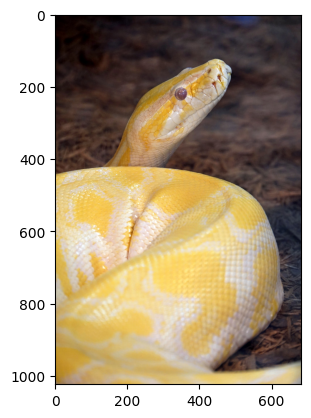

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread("2_python.jpg")
plt.imshow(image)

In [ ]:
image.shape

(1024, 683, 3)

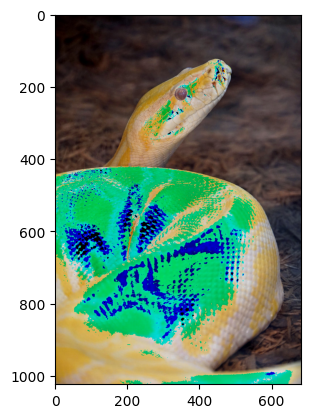

In [ ]:
data = image.copy()
data[data > 220] = 0
plt.imshow(data)

#### Логические операции с логическими массивами NumPy
Раз массивы логических значений так удобны, стоит узнать как осуществлять с ними массовые, *векторные логические операции*.
Создадим два логических массива для экспериментов:

In [ ]:
import numpy as np
A = np.array([False, False, True, True])
B = np.array([False, True, False, True])

Однако логические операции `and`, `or` и `not` с массивами NumPy не работают!

In [ ]:
A and B

ValueError: ignored

Зато работают операции `&`, `|`, `~`:

In [ ]:
print(A)
print(B)
print(A & B)

[False False  True  True]
[False  True False  True]
[False False False  True]


In [ ]:
print(A)
print(B)
print(A | B)

[False False  True  True]
[False  True False  True]
[False  True  True  True]


In [ ]:
print(A)
print(~A)

[False False  True  True]
[ True  True False False]


###  Редукция массивов NumPy методами any и all
Для редукции логического массива лучше пользоваться не стандартными `all` и `any`, а **аналогичными методами** массива:

In [ ]:
import numpy as np
logical_array = np.array([[ True,  True,  True,  True,  True],
                          [ True, False, False, False,  True],
                          [False,  True, False, False,  True],
                          [False, False, False, False,  True]])

In [ ]:
any(logical_array)

ValueError: ignored

In [ ]:
logical_array.all()

False

При этом в NumPy можно провести редукцию логического массива по конкретной оси!

Для этого в параметре метода укажем индекс оси:

In [ ]:
logical_array.any(0)

array([ True,  True,  True,  True,  True])

In [ ]:
logical_array.any(1)

array([ True,  True,  True,  True])

In [ ]:
logical_array.all(0)

array([False, False, False, False,  True])

In [ ]:
logical_array.all(1)

array([ True, False, False, False])

## Основы работы с данными в Pandas
Pandas — популярная библиотека для работы с табличными данными различных типов.
С её помощью загрузка файла в формате CSV или XLS становится примитивной:

In [ ]:
!wget -O "demodata.csv" "https://drive.google.com/uc?id=1q7uSBWVzmanMtdtnBUOjJm8BXwBgAb0p&export=download"

--2023-10-30 17:44:03--  https://drive.google.com/uc?id=1q7uSBWVzmanMtdtnBUOjJm8BXwBgAb0p&export=download
Resolving drive.google.com (drive.google.com)... 74.125.128.101, 74.125.128.138, 74.125.128.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.128.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g9vbfeapm5j1js47s2lo5vfd05ips1k7/1698687825000/05476118052512889131/*/1q7uSBWVzmanMtdtnBUOjJm8BXwBgAb0p?e=download&uuid=6038e4dc-58a7-456a-a762-b142196c3d91 [following]
--2023-10-30 17:44:04--  https://doc-14-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g9vbfeapm5j1js47s2lo5vfd05ips1k7/1698687825000/05476118052512889131/*/1q7uSBWVzmanMtdtnBUOjJm8BXwBgAb0p?e=download&uuid=6038e4dc-58a7-456a-a762-b142196c3d91
Resolving doc-14-1g-docs.googleusercontent.com (doc-14-1g-docs.googleusercontent.com)... 173.194.79.132, 2a00:

In [ ]:
import pandas as pd
data = pd.read_csv("demodata.csv")

Что за тип у объекта, который хранит считанные из файла данные?

In [ ]:
type(data)

pandas.core.frame.DataFrame

`DataFrame` — основной тип библиотеки Pandas, и почти все операции над листом с данными будут осуществляться через его методы.

Размеры листа хранятся в *атрибуте* `shape`:

In [ ]:
data.shape

(10, 6)

### Знакомство с данными
После того, как вы открыли файл, нужно познакомиться с данными. Для этого есть несколько путей.

Посмотреть на несколько первых строк:

In [ ]:
data

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False
1,1,2008-05-01,Thu,0.076192,3.167181e+06,True
2,2,2008-05-02,Fri,-0.868510,9.589767e+06,False
3,3,2008-05-03,Sat,-0.427011,8.949415e+06,False
4,4,2008-05-04,Sun,0.253255,9.371634e+05,True
5,5,2008-05-05,Mon,-0.681516,9.495799e+05,False
6,6,2008-05-06,Tue,0.007191,7.268427e+06,True
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True
8,8,2008-05-08,Thu,-1.184101,1.920960e+06,False
9,9,2008-05-09,Fri,-1.580369,8.456241e+06,False


In [ ]:
data.head(3)

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False
1,1,2008-05-01,Thu,0.076192,3.167181e+06,True
2,2,2008-05-02,Fri,-0.868510,9.589767e+06,False


Иногда полезно посмотреть не только на "голову", но и на "хвостик" листа с данными:

In [ ]:
data.tail(3)

,clientid,date,weekdays,gains,prices,up
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True
8,8,2008-05-08,Thu,-1.184101,1.920960e+06,False
9,9,2008-05-09,Fri,-1.580369,8.456241e+06,False


Узнать подробную информацию о названиях и *типах данных* в столбцах:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  10 non-null     int64  
 1   date      10 non-null     object 
 2   weekdays  10 non-null     object 
 3   gains     10 non-null     float64
 4   prices    10 non-null     float64
 5   up        10 non-null     bool   
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 538.0+ bytes


In [ ]:
1 - 1/9

0.8888888888888888

In [ ]:
(10000*3 + 1000000)/4

257500.0

Основные статистические характеристики, описывающие распределение величин в числовых столбцах:

In [ ]:
data.describe()

,clientid,gains,prices
count,10.00000,10.000000,1.000000e+01
mean,4.50000,-0.425495,5.654715e+06
std,3.02765,0.690446,3.485657e+06
min,0.00000,-1.580369,9.371634e+05
25%,2.25000,-0.821761,2.232515e+06
50%,4.50000,-0.475796,7.392721e+06
75%,6.75000,0.058941,8.290031e+06
max,9.00000,0.674497,9.589767e+06


### Серии данных в конкретном столбце

Для дальнейшей работы с данными нам понадобится список столбцов.
Обратите внимание, что это *не метод*, а просто **атрибут** листа с данными, а значит `columns` не нужно вызывать с круглыми скобками:

In [ ]:
list(data.columns)

['clientid', 'date', 'weekdays', 'gains', 'prices', 'up']

Для того, чтобы получить один столбец из листа, нужно написать имя столбца в кавычках и квадратных скобках:

In [ ]:
data.date

0    2008-04-30
1    2008-05-01
2    2008-05-02
3    2008-05-03
4    2008-05-04
5    2008-05-05
6    2008-05-06
7    2008-05-07
8    2008-05-08
9    2008-05-09
Name: date, dtype: object

Тип данных у одного столбца с данными уже не `DataFrame`, а `Series`.

In [ ]:
type(data.date)

pandas.core.series.Series

Серию данных из столбца можно также получить, обратившись к нему по имени через точку после имени листа с данными:

In [ ]:
data.date

0    2008-04-30
1    2008-05-01
2    2008-05-02
3    2008-05-03
4    2008-05-04
5    2008-05-05
6    2008-05-06
7    2008-05-07
8    2008-05-08
9    2008-05-09
Name: date, dtype: object

### Фильтрация Pandas DataFrame по логическому условию

In [ ]:
data.up

0    False
1     True
2    False
3    False
4     True
5    False
6     True
7     True
8    False
9    False
Name: up, dtype: bool

In [ ]:
query = data[data.up]
query

,clientid,date,weekdays,gains,prices,up
1,1,2008-05-01,Thu,0.076192,3.167181e+06,True
4,4,2008-05-04,Sun,0.253255,9.371634e+05,True
6,6,2008-05-06,Tue,0.007191,7.268427e+06,True
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True


In [ ]:
query["prices"]

1    3.167181e+06
4    9.371634e+05
6    7.268427e+06
7    7.517015e+06
Name: prices, dtype: float64

In [ ]:
query["prices"].mean()

4722446.46745914

In [ ]:
query["prices"].std()

3216563.773601599

In [ ]:
data.weekdays == 'Wed'

0     True
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
Name: weekdays, dtype: bool

In [ ]:
data[data.weekdays == 'Wed']

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True


Что делать, если мы хотим применить оба условия — потребовать их одновременной истинности?
Как и к массивам NumPy, операции `and`, `or` и `not` к листам с данными неприменимы.

Нужно пользоваться операторами `&`, `|`, `~`, которые приводят к массовым операциям.
Единственное, что нужно учесть, что приоритет этих операций выше, чем у обычных логических, а значит *атомарные высказывания* нужно окружать скобками:

In [ ]:
query = data[(data.weekdays == 'Wed') & (~data.up)]  # Нужны скобки!
query

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False


### Фильтрация при помощи метода `query`
Выбор нужных строк листа при помощи массива логических значений, получаемых из этого же листа, неплох. Но если наименование листа длинное, то записывать его в строке несколько раз кажется затруднительным. Кроме того, необходимость заменять операции может дополнительно затруднить восприятие.

Можно формулировать запрос отбора нужных строк намного проще — через метод `query`:

In [ ]:
data.query('weekdays == "Wed" and (not up)')

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False


При помощи `query` легко формулировать сложные условия отбора. Например, выделим только те строки, где день недели — это воскресенье или же цены ниже среднего и при этом доходы отрицательны:

In [ ]:
result = data.query('weekdays == "Sun" or prices < prices.mean() and gains < 0')
result

,clientid,date,weekdays,gains,prices,up
4,4,2008-05-04,Sun,0.253255,9.371634e+05,True
5,5,2008-05-05,Mon,-0.681516,9.495799e+05,False
8,8,2008-05-08,Thu,-1.184101,1.920960e+06,False


In [ ]:
print("Сумма доходов по данным сделкам:", result['gains'].sum())

Сумма доходов по данным сделкам: -1.61236186952339


### Гистограмма распределения

Модуль Pandas под капотом неявно подключает Matplotlib, поэтому для построения гистограммы распределения не нужно его отдельно подключать, а просто воспользоваться методом `hist`:

<Axes: >

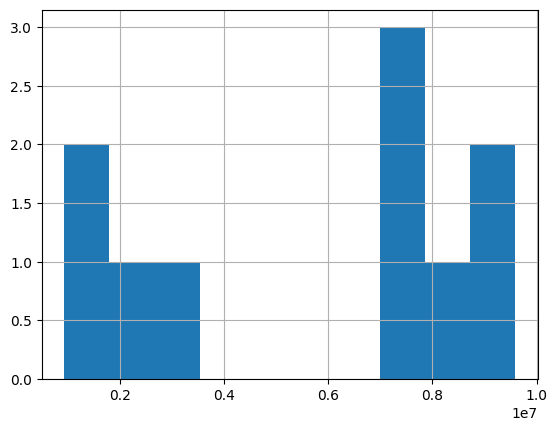

In [ ]:
data["prices"].hist()

### Статистические характеристики выборки данных
Для того чтобы узнать конкретную статистическую характеристику, можно воспользоваться следующими методами:

In [ ]:
data["prices"].min()

937163.4437525265

In [ ]:
data["prices"].max()

9589766.961382903

In [ ]:
print("Среднее значение:", data["prices"].mean())

Среднее значение: 5654715.206961571


In [ ]:
print("Стандартное отклонение:", data["prices"].std())

Стандартное отклонение: 3485656.980782873


In [ ]:
print("Медиана:", data["prices"].median())

Медиана: 7392720.84472501


Кроме медианы можно указать любой квантиль распределения:

In [ ]:
print("Первый квартиль:", data["prices"].quantile(1/4))
print("Третий квартиль:", data["prices"].quantile(3/4))

Первый квартиль: 2232514.840920421
Третий квартиль: 8290031.4672024455


При этом можно применить условие выбора строк по логическому массиву:

In [ ]:
data[data.up]["prices"].mean()

4722446.46745914

А сам логический массив получить через наложение условий на исходный лист с данными:

In [ ]:
data[data.weekdays == 'Wed']["prices"].mean()

7654209.39604469

## Анализ данных абитуриентов Мехмата МГУ
Интересно будет применить наши знания и проанализировать данные приёмной кампании мехмата МГУ по общему конкурсу в 2021 году. Естественно, при анализе данных живых людей возникает *вопрос об этике их использования*, и *вопрос о соблюдении законодательства о персональных данных* (Федеральный закон "О персональных данных" от 27.07.2006 N 152-ФЗ).

Для того чтобы работать с такими данными без особого допуска, осуществляется их деперсонализация, **обезличивание**, то есть такое действие, после которого конкретное физическое лицо не может быть напрямую связано с его данными. Наши данные уже обезличены, поэтому смело будем с ними работать.

Давайте посмотрим на сами данные:

In [ ]:
!wget -O "math_entrants.csv" "https://drive.google.com/uc?id=1P8496NAnNN6zY38ZRSmtQwqXOg1Czz4-&export=download"

--2023-10-30 14:28:32--  https://drive.google.com/uc?id=1P8496NAnNN6zY38ZRSmtQwqXOg1Czz4-&export=download
Resolving drive.google.com (drive.google.com)... 74.125.128.100, 74.125.128.139, 74.125.128.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.128.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bqilspj3pv19pdj923cmgmijb0hceqi6/1698676050000/05476118052512889131/*/1P8496NAnNN6zY38ZRSmtQwqXOg1Czz4-?e=download&uuid=041c7873-45ed-42af-99b7-88c99e319610 [following]
--2023-10-30 14:28:32--  https://doc-08-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bqilspj3pv19pdj923cmgmijb0hceqi6/1698676050000/05476118052512889131/*/1P8496NAnNN6zY38ZRSmtQwqXOg1Czz4-?e=download&uuid=041c7873-45ed-42af-99b7-88c99e319610
Resolving doc-08-1g-docs.googleusercontent.com (doc-08-1g-docs.googleusercontent.com)... 173.194.79.132, 2a00:

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
entrants = pd.read_csv("math_entrants.csv")
entrants.head()

,№,Наличие согласия,Согласие в МГУ,Сумма баллов,Математика (ДВИ),Математика (ЕГЭ),Физика,Русский язык,Индивидуальные достижения - аттестат,Индивидуальные достижения - сочинение,Индивидуальные достижения - ГТО,Преимущественное право зачисления,Право на общежитие,Статус
0,1,Да,Да,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
1,2,Нет,Нет,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
2,3,Нет,Нет,408,100,100,100,100,6,2,0,Нет,Да,В конкурсе
3,4,Нет,Да,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
4,5,Нет,Нет,407,100,99,100,100,6,2,0,Нет,Да,В конкурсе


Для простоты работы со столбцами переименуем их так, чтобы с ними было легче работать. Не будем отказываться полностью от русского языка, но сократим название каждого столбца до одного слова.

Воспользуемся функцией pandas.DataFrame.rename(), которая позволит нам переименовать столбцы.

In [ ]:
entrants.rename(columns = {'Сумма баллов':'сумма',
                           'Математика (ДВИ)':'ДВИ',
                           'Математика (ЕГЭ)':'математика',
                           'Физика':'физика',
                           'Русский язык':'русский',
                           'Индивидуальные достижения - аттестат':'аттестат',
                           'Индивидуальные достижения - сочинение':'сочинение',
                           'Индивидуальные достижения - ГТО':'ГТО',
                           'Преимущественное право зачисления':'преимущество',
                           'Право на общежитие':'общежитие'},
                inplace = True)
entrants.head()

,№,Наличие согласия,Согласие в МГУ,сумма,ДВИ,математика,физика,русский,аттестат,сочинение,ГТО,преимущество,общежитие,Статус
0,1,Да,Да,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
1,2,Нет,Нет,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
2,3,Нет,Нет,408,100,100,100,100,6,2,0,Нет,Да,В конкурсе
3,4,Нет,Да,408,100,100,100,100,6,2,0,Нет,Нет,В конкурсе
4,5,Нет,Нет,407,100,99,100,100,6,2,0,Нет,Да,В конкурсе


Всегда удобнее работать с типом данных bool, чем с типом данных string. Изменим тип данных в столбцах типа "Да/Нет" на логический:

In [ ]:
entrants["Наличие согласия"] = (entrants["Наличие согласия"] == "Да")
entrants["Согласие в МГУ"] = (entrants["Согласие в МГУ"] == "Да")
entrants["преимущество"] = (entrants["преимущество"] == "Да")
entrants["общежитие"] = (entrants["общежитие"] == "Да")
entrants.head()

,№,Наличие согласия,Согласие в МГУ,сумма,ДВИ,математика,физика,русский,аттестат,сочинение,ГТО,преимущество,общежитие,Статус
0,1,True,True,408,100,100,100,100,6,2,0,False,False,В конкурсе
1,2,False,False,408,100,100,100,100,6,2,0,False,False,В конкурсе
2,3,False,False,408,100,100,100,100,6,2,0,False,True,В конкурсе
3,4,False,True,408,100,100,100,100,6,2,0,False,False,В конкурсе
4,5,False,False,407,100,99,100,100,6,2,0,False,True,В конкурсе


In [ ]:
entrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   №                 905 non-null    int64 
 1   Наличие согласия  905 non-null    bool  
 2   Согласие в МГУ    905 non-null    bool  
 3   сумма             905 non-null    int64 
 4   ДВИ               905 non-null    int64 
 5   математика        905 non-null    int64 
 6   физика            905 non-null    int64 
 7   русский           905 non-null    int64 
 8   аттестат          905 non-null    int64 
 9   сочинение         905 non-null    int64 
 10  ГТО               905 non-null    int64 
 11  преимущество      905 non-null    bool  
 12  общежитие         905 non-null    bool  
 13  Статус            905 non-null    object
dtypes: bool(4), int64(9), object(1)
memory usage: 74.4+ KB


Проверим, не у всех ли студентов из данного списка статус "В конкурсе". Если это так, то данный столбец ничем не поможет нам в анализе данных, и мы сможем его удалить

In [ ]:
(entrants['Статус'] == 'В конкурсе').all()

True

У всех. Значит этот столбец можно просто удалить:

In [ ]:
entrants.drop('Статус', axis=1, inplace=True)

Проверим то же самое про преимущество

In [ ]:
entrants["преимущество"].value_counts()

False    905
Name: преимущество, dtype: int64

In [ ]:
entrants["ГТО"].value_counts()

0    746
2    159
Name: ГТО, dtype: int64

In [ ]:
(entrants['преимущество'] == False).all()

True

Значит, от него также можно избавиться

In [ ]:
entrants.drop('преимущество', axis=1, inplace=True)

Общее описание всех параметров данных в pandas можно получить при помощи функции describe

In [ ]:
entrants.describe()

,№,сумма,ДВИ,математика,физика,русский,аттестат,сочинение,ГТО
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,453.000000,351.367956,77.662983,89.240884,89.038674,90.453039,2.671823,1.949171,0.351381
std,261.395295,27.547675,15.383455,7.546133,9.649823,6.576663,2.983645,0.314934,0.761534
min,1.000000,268.000000,50.000000,62.000000,55.000000,60.000000,0.000000,0.000000,0.000000
25%,227.000000,332.000000,65.000000,84.000000,84.000000,86.000000,0.000000,2.000000,0.000000
50%,453.000000,354.000000,80.000000,90.000000,91.000000,92.000000,0.000000,2.000000,0.000000
75%,679.000000,371.000000,90.000000,96.000000,97.000000,96.000000,6.000000,2.000000,0.000000
max,905.000000,408.000000,100.000000,100.000000,100.000000,100.000000,6.000000,2.000000,2.000000



Первое, что стоит сделать — посмотреть как выглядит распределение суммы баллов на гистограмме. Мы увидим, какую структуру имеют данные.

<Axes: ylabel='Frequency'>

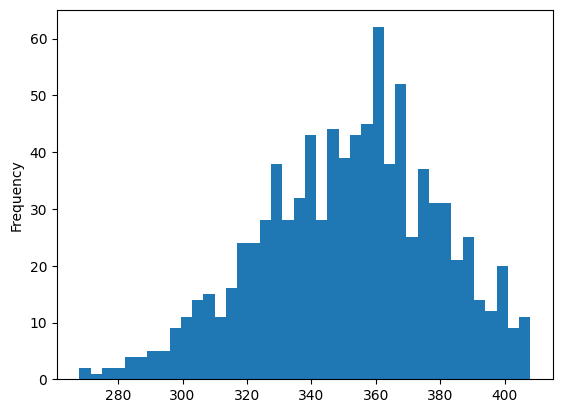

In [ ]:
entrants['сумма'].plot.hist(bins=40)

Проверим, такое же распределение получается у студентов, сдавших успешно ГТО? Может быть, ГТО существенно повлияло на их поступление, хотя они менее или более талантливы, чем другие студенты?

352.61006289308176


<Axes: ylabel='Frequency'>

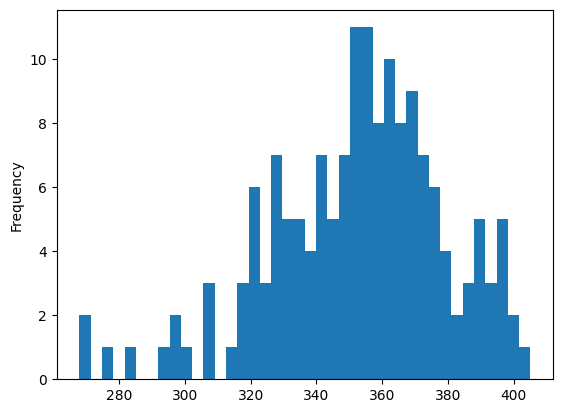

In [ ]:
print(entrants.query('ГТО == 2')['сумма'].mean())
entrants.query('ГТО == 2')['сумма'].plot.hist(bins=40)

Как мы видим, распределение очень похоже, имеет тот же максимум. Значит, наша гипотеза не верна. А что насчет несдавших ГТО?

<Axes: ylabel='Frequency'>

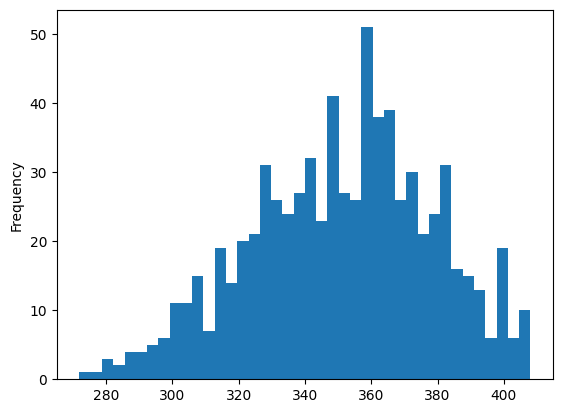

In [ ]:
entrants.query('ГТО == 0')['сумма'].plot.hist(bins=40)

<Axes: ylabel='Frequency'>

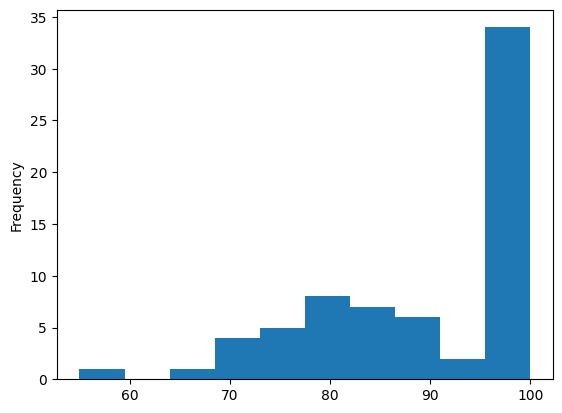

In [ ]:
entrants.query("`математика` == 100")["ДВИ"].plot.hist(bins=10)

Последняя гипотеза также оказалась верна. На деле не всегда бывает так.

Query — вообще очень мощный инструмент, позволяющий отфильтровать данные по ключевому запросу. Например, мы можем вывести всех абитуриентов, сдавших физику менее, чем на 80 баллов, следующей командой

In [ ]:
entrants.query("физика < 80")

,№,Наличие согласия,Согласие в МГУ,сумма,ДВИ,математика,физика,русский,аттестат,сочинение,ГТО,общежитие
194,195,False,True,373,100,99,78,94,0,2,0,True
255,256,False,True,368,100,94,74,98,0,2,0,False
256,257,False,False,368,100,92,76,98,0,2,0,False
314,315,False,True,363,95,96,76,94,0,2,0,False
326,327,False,False,362,100,94,72,94,0,2,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
900,901,False,True,277,55,72,64,78,6,2,0,True
901,902,False,False,275,50,78,57,80,6,2,2,True
902,903,False,True,272,60,70,60,80,0,2,0,False
903,904,False,True,270,70,70,57,69,0,2,2,False


Выдвинем следующую гипотезу:
студенты, успешно сдавшие ЕГЭ по математике, должны были хорошо сдать и ДВИ. Если это так, и если мы отметим всех студентов в координатах "Балл за ДВИ" - "Балл за ЕГЭ по математике", мы должны увидеть скопление в области высоких баллов по обеим осям. Изобразим такой поточечный график

<Axes: xlabel='ДВИ', ylabel='математика'>

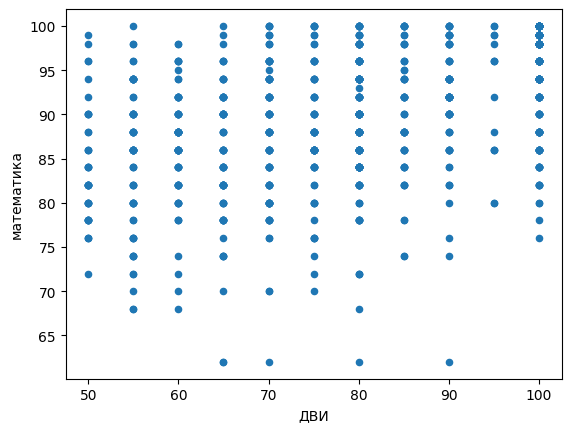

In [ ]:
entrants.plot.scatter("ДВИ", "математика")

Кажется, что распределение баллов по математике при каждом фиксированном балле за ДВИ почти равномерное в области "Балл за математику > 75". Но так ли это в действительности? Может быть, все дело в особенности отображения поточечного графика?

Нарисуем другой тип графика — так называемые "свечи":

<Axes: >

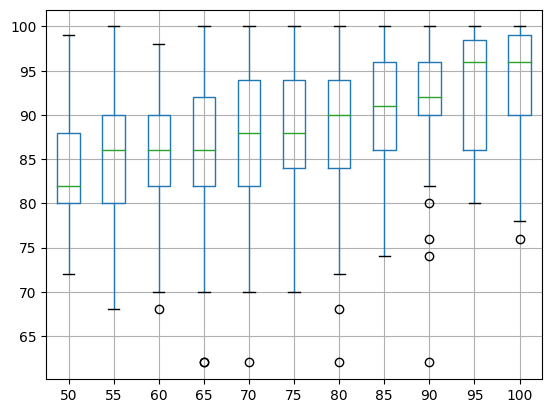

In [ ]:
entrants.pivot_table(index='№', columns='ДВИ', values='математика').boxplot()

Обратите внимание, мы действительно наблюдаем смещение медианного значения балла ЕГЭ по математике ближе к 100 при увеличении баллов за ДВИ. Это подтверждает нашу гипотезу. Проверим это, применив усреднение

In [ ]:
entrants.pivot_table(index='ДВИ', values='математика', aggfunc='mean')

,математика
ДВИ,
50,84.073171
55,85.217391
60,86.408451
65,85.467532
70,87.857143
75,88.162162
80,89.401361
85,90.433333
90,91.817073


<Axes: xlabel='ДВИ'>

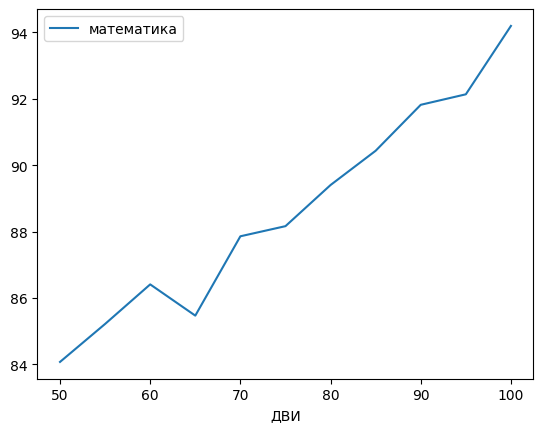

In [ ]:
entrants.pivot_table(index='ДВИ', values='математика', aggfunc='mean').plot()

Есть ли подобные корелляции в случае с парой "Физика"/"Математика"?

<Axes: xlabel='физика', ylabel='математика'>

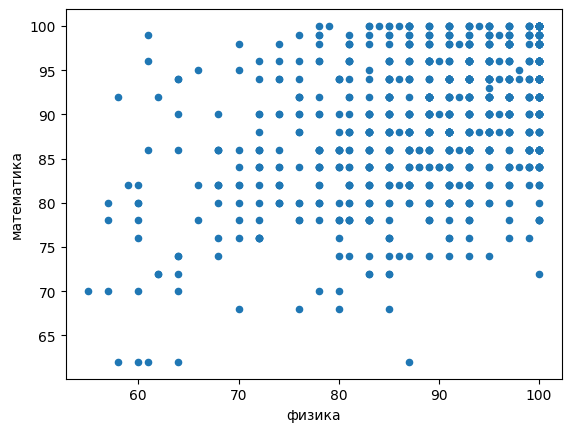

In [ ]:
entrants.plot.scatter("физика", "математика")

<Axes: >

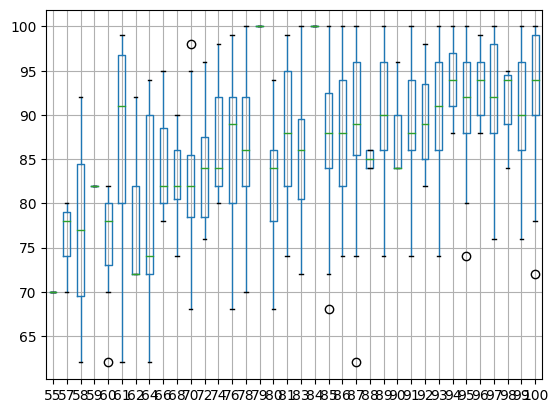

In [ ]:
entrants.pivot_table(index='№', columns='физика', values='математика').boxplot()

Здесь корелляция видна невооруженным глазом. Протестируем другие пары предметов

<Axes: xlabel='математика', ylabel='русский'>

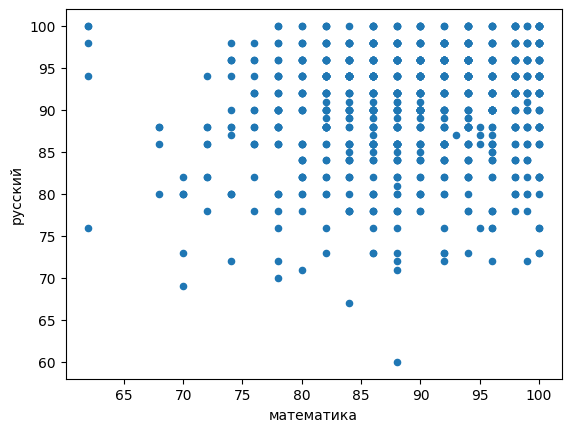

In [ ]:
entrants.plot.scatter("математика", "русский")

<Axes: >

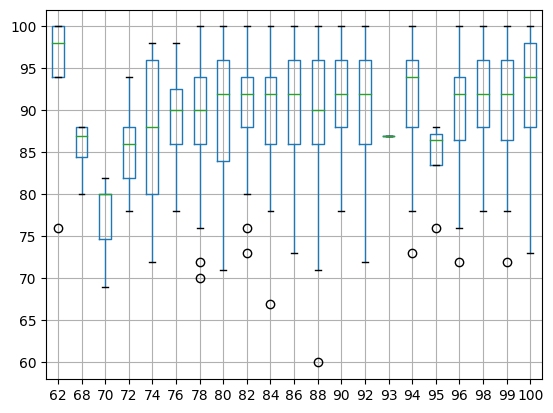

In [ ]:
entrants.pivot_table(index='№', columns='математика', values='русский').boxplot()

С русским языком такой корелляции не прослеживается. Это объяснимо: знание физики и математики связано друг с другом, как и способность студента одновременно хорошо сдать математику ДВИ и математику ЕГЭ. С русским языком же такой зависимости не наблюдается.

Напоследок проверим следующую гипотезу:

Среди студентов, сдавших ЕГЭ на 100 баллов, подавляющее большинство сдало ДВИ также на 100 (или почти 100) баллов.

<Axes: ylabel='Frequency'>

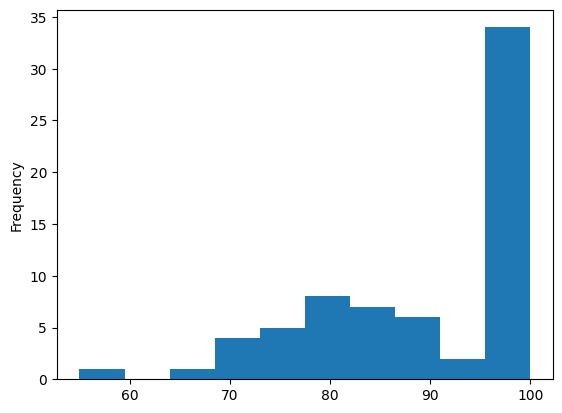

In [ ]:
entrants.query("`математика` == 100")["ДВИ"].plot.hist(bins=10)

Последняя гипотеза также оказалась верна. На деле не всегда бывает так.

In [ ]:
data

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False
1,1,2008-05-01,Thu,0.076192,3.167181e+06,True
2,2,2008-05-02,Fri,-0.868510,9.589767e+06,False
3,3,2008-05-03,Sat,-0.427011,8.949415e+06,False
4,4,2008-05-04,Sun,0.253255,9.371634e+05,True
5,5,2008-05-05,Mon,-0.681516,9.495799e+05,False
6,6,2008-05-06,Tue,0.007191,7.268427e+06,True
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True
8,8,2008-05-08,Thu,-1.184101,1.920960e+06,False
9,9,2008-05-09,Fri,-1.580369,8.456241e+06,False


In [ ]:
data

,clientid,date,weekdays,gains,prices,up
0,0,2008-04-30,Wed,-0.524582,7.791404e+06,False
1,1,2008-05-01,Thu,0.076192,3.167181e+06,True
2,2,2008-05-02,Fri,-0.868510,9.589767e+06,False
3,3,2008-05-03,Sat,-0.427011,8.949415e+06,False
4,4,2008-05-04,Sun,0.253255,9.371634e+05,True
5,5,2008-05-05,Mon,-0.681516,9.495799e+05,False
6,6,2008-05-06,Tue,0.007191,7.268427e+06,True
7,7,2008-05-07,Wed,0.674497,7.517015e+06,True
8,8,2008-05-08,Thu,-1.184101,1.920960e+06,False
9,9,2008-05-09,Fri,-1.580369,8.456241e+06,False


# Библиотека Pandas детально


In [ ]:
import numpy as np
import pandas as pd

## Объекты класса `pandas.Series`
Серия — это массив NumPy, но с именем и с дополнительной индексацией ячеек: индексами на основе меток (label-based indexing).

Если индексы-метки не указать при создании серии, то по умолчанию они совпадают с порядковыми индексами от 0.

In [ ]:
ages = pd.Series([22, 35, 25, 16], name="age")
print(ages)

0    22
1    35
2    25
3    16
Name: age, dtype: int64


Можно явно указать индексы через параметр конструктора `index`:

In [ ]:
named_ages = pd.Series(data=[22, 35, 25, 16], index=["Aline", "Beatrice", "Clara", "Diana"], dtype=np.int32, name="age")
print(named_ages)

Aline       22
Beatrice    35
Clara       25
Diana       16
Name: age, dtype: int32


Доступ с квадратными скобками `series[i]` возможен как через числовые индексы, так и по меткам:

In [ ]:
named_ages["Beatrice"]

35

In [ ]:
named_ages[1]

35

### Сложности двойной индексации и их решение: `loc`, `iloc`, `at`, `iat`
Создадим простую серию с числами и возьмём её срез:

In [ ]:
numbers = pd.Series(range(0, 1000, 100))
the_slice = numbers[2:7]
print(the_slice)

2    200
3    300
4    400
5    500
6    600
dtype: int64


In [ ]:
numbers

0      0
1    100
2    200
3    300
4    400
5    500
6    600
7    700
8    800
9    900
dtype: int64

Обратите внимание, что после среза индексы-метки остались закреплёнными за своими значениями элементов.
Это правильно с точки зрения *идентификации* хранимых данных. Особенно, если данные про одну сущность будут находиться в разных сериях и потом их нужно будет сопоставлять.

Однако, в результате появляется **неоднозначность индексации**.

Доступ с квадратными скобками теперь работает только по индексам-меткам:

In [ ]:
the_slice[2]

200

In [ ]:
the_slice.loc[2:5]

2    200
3    300
4    400
5    500
dtype: int64

Взгляните! элемент с индексом-меткой 5 включён в срез, что противоречит логике `range(start, stop, step)`.
Почему так?! Подумайте про срезы с метками строкового типа и посмотрите на пример ниже:

In [ ]:
named_ages

Aline       22
Beatrice    35
Clara       25
Diana       16
Name: age, dtype: int32

In [ ]:
named_ages.loc["Beatrice":"Diana"]

Beatrice    35
Clara       25
Diana       16
Name: age, dtype: int32

Если доступ нужен только к одному элементу, то можно вместо `loc` и `iloc` воспользоватсья `at` и `iat`:

In [ ]:
the_slice.at[4]

400

In [ ]:
the_slice.iat[4]

600

### Добавление данных в серию, удаление
В отличие от массивов NumPy, серии имеют переменный размер:

In [ ]:
s = pd.Series(data=[0, 10, 20, 30], index=[1, 2, 3, 4])
print(s)

1     0
2    10
3    20
4    30
dtype: int64


In [ ]:
s.pop(1) # удаление элемента с индексом-меткой 1

0

In [ ]:
print(s)

2    10
3    20
4    30
dtype: int64


Добавление элементов с присваиванием индекса-метки можно делать через локатор `loc`:

In [ ]:
s.loc[5] = 50
print(s)

2    10
3    20
4    30
5    50
dtype: int64


Обратите внимание, что таким добавлением можно нарушить порядок индексов:

In [ ]:
s.loc[4] = 40
print(s)

2    10
3    20
4    40
5    50
dtype: int64


Если индексы-метки нужно пересортировать, можно сделать это при помощи `sort_index`:

In [ ]:
s.sort_index(inplace=True)
print(s)

2    10
3    20
4    40
5    50
dtype: int64


Ещё более курьёзную ситуацию с индексами можно создать при помощи конкатенации серий функцией `pd.concat`:

In [ ]:
a = pd.Series(data=[10, 20, 40], index=[1, 2, 4])
b = pd.Series(data=[100, 200, 300], index=[1, 2, 3])
c = pd.concat([a, b])
print(c)

1     10
2     20
4     40
1    100
2    200
3    300
dtype: int64


In [ ]:
c.index

Int64Index([1, 2, 4, 1, 2, 3], dtype='int64')

In [ ]:
c[1] = 10000
print(c)

1    10000
2       20
4       40
1    10000
2      200
3      300
dtype: int64


Итак, **индексы-метки могут оказаться не уникальными**!!! И присваивание в такую метку приводит к изменению всех значений с этой меткой.

Лучше такой ситуации не создавать. Вот так можно проверить, что метки уникальны:

In [ ]:
c.index.is_unique

False

### Редукция серий
Агрегирующие методы по сравнению с массивами `NumPy.ndarray` в сериях переопределены: в них допускаются и просто игнорируются пустые ячейки, которые представлены как `NaN` (Not a Number).

In [ ]:
values = [1, 3, 5, np.nan, 1, np.nan, 3]
array = np.array(values)
series = pd.Series(values)

for container in array, series:
    print(type(container))
    print(container.min(), container.max(), container.sum(), container.prod(), sep='\t')

<class 'numpy.ndarray'>
nan	nan	nan	nan
<class 'pandas.core.series.Series'>
1.0	5.0	13.0	45.0


Уникальные значения из серии можно получить методом `unique`. Только нужно понимать, что результат — это уже не серия, а просто массив NumPy, поскольку для массива уникальных значений теряется смысл индексов-меток:

In [ ]:
series.unique()

array([1., 3., 5., 0.])

In [ ]:
series

0    1.0
1    3.0
2    5.0
3    0.0
4    1.0
5    0.0
6    3.0
dtype: float64

Частотный анализ для значений в серии можно запустить методом `value_counts`:

In [ ]:
series.value_counts()

1.0    2
3.0    2
5.0    1
dtype: int64

Для статистической обработки есть большое количество методов:

In [ ]:
series.mean()  # среднее арифметическое

2.6

In [ ]:
series.std()  # среднеквадратическое отклонение

1.6733200530681511

In [ ]:
series.median()  # медиана

3.0

In [ ]:
series.quantile(3/4)  # произвольный квантиль, например, 3-я квартиль (число, меньше либо равно которого 75% чисел серии)

3.0

Все функции выше вычислялись только *для содержательных — не пустых* элементов серии. Узнать их количество можно методом `count`:

In [ ]:
series.count()  # количество содержательных элементов в серии

5

### Отсутствующие значения в серии
Поскольку в серии допускаются значения `NaN`, которые по-умолчанию не учитываются в статистических функциях, нужно уметь с ними работать:
1. проверять факт их наличия в серии,
2. считать их количество,
3. выбрасывать (`drop`) такие ячейки из серии,
4. массово заменять их на другие значения.

In [ ]:
series.isna()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
dtype: bool

In [ ]:
series.isna().any()

True

Просуммировав эту серию, мы узнаем количество пустых ячеек (т.к. при арифметическом сложении превращаются: `True` — в `1`, а `False` — в `0`):

In [ ]:
series.isna().sum()

2

In [ ]:
series.dropna()

0    1.0
1    3.0
2    5.0
4    1.0
6    3.0
dtype: float64

Надо помнить, что метод `dropna`, как и многие другие методы, *не модифицирует текущую серию, а создаёт и возвращает новую*. Поэтому наша серия останется в старом состоянии:

In [ ]:
series

0    1.0
1    3.0
2    5.0
3    NaN
4    1.0
5    NaN
6    3.0
dtype: float64

Если мы хотим поменять текущую серию, нужно указать значение ключевого параметра `inplace=True`:

In [ ]:
series.dropna(inplace=True)
series

0    1.0
1    3.0
2    5.0
4    1.0
6    3.0
dtype: float64

То же касается метода `fillna` массовой замены значений `NaN` на другое:

In [ ]:
series = pd.Series([1, 3, 5, np.nan, 1, np.nan, 3])
series.fillna(0, inplace=True)
series

0    1.0
1    3.0
2    5.0
3    0.0
4    1.0
5    0.0
6    3.0
dtype: float64

### Векторные (массовые операции)
Как и для массивов NumPy для серий работают массовые операции:

In [ ]:
A = pd.Series(data=[10, 20, 30, 40], index=["A", "B", "C", "D"])
B = pd.Series(data=[1, 2, 3, 4], index=["A", "B", "C", "D"])

In [ ]:
A + B

A    11
B    22
C    33
D    44
dtype: int64

In [ ]:
A * B

A     10
B     40
C     90
D    160
dtype: int64

Массовые операции работают не только с двумя сериями, но и с константами:

In [ ]:
-A + 25

A    15
B     5
C    -5
D   -15
dtype: int64

In [ ]:
A > 20

A    False
B    False
C     True
D     True
dtype: bool

In [ ]:
B == 3

A    False
B    False
C     True
D    False
dtype: bool

In [ ]:
B != 3

A     True
B     True
C    False
D     True
dtype: bool

Применить какую-то функцию к каждому элементу серии можно при помощи метода `apply`:

In [ ]:
B.apply(lambda x: x*100)

A    100
B    200
C    300
D    400
dtype: int64

Значения из одной серии можно *массово скопировать в другую серию* методом `update`, при этом опора будет производиться на индексы-метки, а не на последовательность элементов. При этом для меток старой серии, к которой не найдены метки новой серии, будут оставлены старые значения:

In [ ]:
A = pd.Series(data=[100, 200, 500, 0], index=["Aline", "Beatrice", "Clara", "Diana"], name="money")
B = pd.Series(data=[300, 0], index=["Diana", "Aline"])
print(A)
A.update(B)
print(A)

Aline       100
Beatrice    200
Clara       500
Diana         0
Name: money, dtype: int64
Aline         0
Beatrice    200
Clara       500
Diana       300
Name: money, dtype: int64


## Объекты класса DataFrame
После знакомства с сериями `Series` легче понять как формируется лист с данными.
По сути это несколько серий-столбцов с одинаковым индексом по вертикали, а последовательность имён столбцов составляет горизонтальный индекс таблицы.

In [ ]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6], "C": [7, 8, 9]},
                  index = ["first", "second", "third"])
df

,A,B,C
first,1,4,7
second,2,5,8
third,3,6,9


In [ ]:
df.index

Index(['first', 'second', 'third'], dtype='object')

In [ ]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

Доступ к сериям-столбцам можно делать через квадратные скобки или через оператор `.` (если имя является допустимым идентификатором):

In [ ]:
df['A']

first     1
second    2
third     3
Name: A, dtype: int64

In [ ]:
df.A

first     1
second    2
third     3
Name: A, dtype: int64

In [ ]:
type(df.A)

pandas.core.series.Series

Однако, отличие в доступе всё-таки есть. Через точку нельзя создать новый столбец:

In [ ]:
df.D = df.A*100 + df.B*10 + df.C
df

<ipython-input-468-9337ab3efa81>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.D = df.A*100 + df.B*10 + df.C


,A,B,C
first,1,4,7
second,2,5,8
third,3,6,9


In [ ]:
df['D'] = df.A*100 + df.B*10 + df.C
df

,A,B,C,D
first,1,4,7,147
second,2,5,8,258
third,3,6,9,369


In [ ]:
df['D']

first     147
second    258
third     369
Name: D, dtype: int64

### Сложности индексации и их решение: loc, iloc.
Квадратные скобки дают как доступ к столбцам, так и, в случае среза — к строкам:

In [ ]:
df[1:3]  # срез по порядковым индексам

,A,B,C,D
second,2,5,8,258
third,3,6,9,369


In [ ]:
df['first':'second']  # срез по индексам-меткам (включая конечную)

,A,B,C,D
first,1,4,7,147
second,2,5,8,258


In [ ]:
df.iloc[1:3]

,A,B,C,D
second,2,5,8,258
third,3,6,9,369


In [ ]:
df.loc['first':'second']

,A,B,C,D
first,1,4,7,147
second,2,5,8,258


Новая возможность — локатор позволяет получить *серию значений одной строки*. В этом случае индекс строки становится `name` серии:

In [ ]:
df.loc['second']

A      2
B      5
C      8
D    258
Name: second, dtype: int64

*Запятая в квадратных скобках* позволяет достать **значение конкретной ячейки** или **срез по строкам и столбцам одновременно**:

In [ ]:
df.loc['first', 'A']

1

In [ ]:
df.loc['first':'second', 'B':'C']

,B,C
first,4,7
second,5,8


Также интересно то, что **локатор в квадратных скобках может принимать список индексов**, причём в произвольном порядке:

In [ ]:
df.loc[['third', 'first'], ['D', 'B', 'C']]

,D,B,C
third,369,6,9
first,147,4,7


В срезах можно пропускать параметры начала и конца, а также указывать третий параметр — шаг:

In [ ]:
l = [1,2,3]

l[:]

[1, 2, 3]

In [ ]:
df.iloc[:, ::-1]

,D,C,B,A
first,147,7,4,1
second,258,8,5,2
third,369,9,6,3


### Редукция столбцов и строк
Очевидно, редукцию одного конкретного столбца или строки с конкретным индексом можно выполнить, предварительно выделив её как `Series`, но есть и возможность массовой редукции по заданной оси:

In [ ]:
df.sum(axis=1)  # указываем axis=1 для свёртки по горизонтали

first     159
second    273
third     387
dtype: int64

In [ ]:
df.sum()  # по-умолчанию axis=0, свёртка по вертикали

A      6
B     15
C     24
D    774
dtype: int64

In [ ]:
df.max(axis=1)

first     147
second    258
third     369
dtype: int64

In [ ]:
df.idxmax(axis=1)

first     D
second    D
third     D
dtype: object

Можно сделать свёртку сразу несколькими функциями при помощи метода `aggregate` (alias `agg`):

In [ ]:
df.aggregate(['min', 'idxmin', 'max', 'idxmax', 'mean', 'sum'], axis=1)

,min,idxmin,max,idxmax,mean,sum
first,1,A,147,D,39.75,159
second,2,A,258,D,68.25,273
third,3,A,369,D,96.75,387


### Чистка данных. Методы `drop` и `dropna`
Исходные данные часто содержат лишнюю информацию, которую требуется исключить. Если нужно сохранить изменения в самой таблице, то следует добавлять параметр `inplace=True`, но сейчас мы этого делать не будем, оставляя лист в его исходном состоянии.

Чтобы отбросить лишние столбцы, используют метод `drop` с ключевым параметром `columns` и списком имён:

In [ ]:
df.drop(columns=['B', 'D'])

,A,C
first,1,7
second,2,8
third,3,9


Для отбрасывания строк используют метод `drop` с ключевым параметром `labels`:

In [ ]:
df.drop(labels=['first'])

,A,B,C,D
second,2,5,8,258
third,3,6,9,369


Теперь добавим в лист одну ячейку `NaN`:

In [ ]:
df.loc['second', 'C'] = np.nan
df

,A,B,C,D
first,1,4,7.0,147
second,2,5,NaN,258
third,3,6,9.0,369


Теперь посмотрите как работает метод `dropna`:

In [ ]:
df.dropna()  # по умолчанию выбрасываются все строки, в которых есть хотя бы одно значение NaN

,A,B,C,D
first,1,4,7.0,147
third,3,6,9.0,369


In [ ]:
df.dropna(axis='columns')  # можно вместо строк с NaN выбросить столбцы:

,A,B,D
first,1,4,147
second,2,5,258
third,3,6,369


Кроме стратегии выбрасывания данных есть ещё возможность заполнить пропуски константой:

In [ ]:
df.fillna(0)

,A,B,C,D
first,1,4,7.0,147
second,2,5,0.0,258
third,3,6,9.0,369


Или, как вариант, заполнить ячейки `NaN` через интерполяцию <sup>[[1]](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F)</sup> по соседним ячейкам серии-столбца:

In [ ]:
df.interpolate()

,A,B,C,D
first,1,4,7.0,147
second,2,5,8.0,258
third,3,6,9.0,369


## Сложные приёмы обработки данных
Есть некоторые приёмы работы с `DataFrame`, которые позволяют быстро переформатировать данные так, чтобы необходимая информация лежала на поверхности.

Представьте себе ситуацию, когда исходная таблица с данными содержит случаи, которые можно *классифицировать* по нескольким категориям. Например, друзья работали на огороде и собирали картошку и морковку. Вот таблица их "вкладов" в общую корзину:

In [ ]:
commits = pd.DataFrame({"name": ["Петя", "Вася", "Таня", "Петя", "Петя", "Таня", "Вася", "Петя", "Таня"],
                        "potatoes": [3, 4, 0, 3, 4, 0, 6, 3, 0],
                        "carrots": [0, 2, 5, 2, 1, 4, 15, 2, 6]})
commits

,name,potatoes,carrots
0,Петя,3,0
1,Вася,4,2
2,Таня,0,5
3,Петя,3,2
4,Петя,4,1
5,Таня,0,4
6,Вася,6,15
7,Петя,3,2
8,Таня,0,6


Конечно, мы можем найти суммарное количество картошек и морковок в общей корзине или минимальное/максимальное количество за 1 вклад:

In [ ]:
commits.sum()

name        ПетяВасяТаняПетяПетяТаняВасяПетяТаня
potatoes                                      23
carrots                                       37
dtype: object

In [ ]:
commits.agg(["min", "max"])

,name,potatoes,carrots
min,Вася,0,0
max,Таня,6,15


Однако, имена тут только мешают, не имеют содержательной информации. А хотелось бы узнать статистику по каждому другу отдельно...

### Метод `groupby`
Метод `groupby` осуществляет что-то вроде корзинной сортировки для последующей редукции.

Группировка происходит по уникальным значениям в указанном столбце. Эти значения будут играть роль индекса в новом листе.

In [ ]:
commits.groupby("name")  # разложим все вклады по именам вкладчиков

Объект со сгруппированными по указанному столбцу объектами мы и видим, но чтобы его использовать по назначению, требуется агрегировать случаи в каждой группе

In [ ]:
commits.groupby("name").sum()  # количество овощей, *сгруппированное* по имени вкладчика:

,potatoes,carrots
name,,
Вася,10,17
Петя,13,5
Таня,0,15


Чтобы вычислить несколько статистических функций, можно использовать метод `agg` (синоним `aggregate`).

In [ ]:
commits.groupby("name").carrots.aggregate(["min", "max"])  # мин. и макс. количество морковок за один вклад

,min,max
name,,
Вася,2,15
Петя,0,2
Таня,4,6


Если агрегацию при этом сделать сразу по нескольким числовым столбцам, то у нас получится *двухуровневый индекс* для столбцов:

In [ ]:
commits.groupby("name").aggregate(["min", "max"])  # мин. и макс. количество овощей за один вклад

potatoes     carrots    
          min max     min max
name                         
Вася        4   6       2  15
Петя        3   4       0   2
Таня        0   0       4   6

### Сводная таблица `pivot_table`
Иногда нужно осуществить группировку случаев-строк сразу по нескольким категориальным параметрам.

Допустим, участники олимпиады по программированию отправляли задачи в электронный контест. Таблица отправок в систему содержит:

1. `run_id` — идентификатором запуска проверки,
2. `username` — хешем имени пользователя,
3. `problem` — буквой-идентификатором решаемой задачи,
4. `result` — вердиктом проверяющей системы,
5. `tests` — количеством успешно пройденных тестов при запуске,
6. `score` — набранными очками.

In [ ]:
runs = pd.read_csv("olymp3_results.csv", index_col='run_id')
runs.head()

,username,problem,result,tests,score
run_id,,,,,
0,ae7ba9eb,B,OK,12,120
1,3470f1fd,A,OK,4,100
2,ae7ba9eb,C,OK,20,120
3,3470f1fd,B,partial,11,11
4,3470f1fd,B,OK,12,119


In [ ]:
runs.shape

(264, 5)

Обратите внимание, что один и тот же участник мог отправлять задачу много раз.
Допустим, нас интересует максимальное количество очков за каждый вид задачи, причём — отдельно для каждого пользователя.

В этом случае разумно сделать в сводной таблице идентификатор пользователя индексом-меткой строки, а букву-идентфикатор задачи — индексом-меткой столбца. При этом информация из столбцов `result`, `test` и индекса `run_id` нас не интересует совсем — в качестве *значений* нас интересует только `score`:

In [ ]:
standings = runs.pivot_table(values="score", index="username", columns="problem", aggfunc="max")
standings  # сводная таблица результатов участников

problem,A,B,C,D,E,F,G
username,,,,,,,
012ebf1a,100.0,119.0,120.0,100.0,NaN,NaN,NaN
04652344,100.0,120.0,120.0,99.0,NaN,200.0,200.0
133bea0b,99.0,119.0,115.0,99.0,149.0,197.0,198.0
144a02e6,99.0,119.0,3.0,99.0,150.0,NaN,2.0
3274f498,100.0,119.0,119.0,99.0,149.0,NaN,197.0
3470f1fd,100.0,119.0,120.0,100.0,149.0,197.0,194.0
4d990bd5,NaN,NaN,120.0,NaN,NaN,NaN,NaN
63590cda,NaN,NaN,0.0,NaN,NaN,NaN,NaN
6bfd137c,100.0,120.0,19.0,100.0,NaN,NaN,NaN


Из пожеланий к этой таблице результатов:

In [ ]:
# 1. Заменить `NaN` на 0.
standings.fillna(0, inplace=True)  # можно было указать fill_value=0 для pivot_table
standings.head(3)

problem,A,B,C,D,E,F,G
username,,,,,,,
012ebf1a,100.0,119.0,120.0,100.0,0.0,0.0,0.0
04652344,100.0,120.0,120.0,99.0,0.0,200.0,200.0
133bea0b,99.0,119.0,115.0,99.0,149.0,197.0,198.0


In [ ]:
# 2. В последнем столбце `score` посчитать сумму
#    максимальных достигнутых баллов для каждого пользователя.
standings["score"] = standings.sum(axis=1)
standings.head(3)

problem,A,B,C,D,E,F,G,score
username,,,,,,,,
012ebf1a,100.0,119.0,120.0,100.0,0.0,0.0,0.0,439.0
04652344,100.0,120.0,120.0,99.0,0.0,200.0,200.0,839.0
133bea0b,99.0,119.0,115.0,99.0,149.0,197.0,198.0,976.0


In [ ]:
# 3. Отсортировать по убыванию `score` все строки таблицы.
standings.sort_values(by="score", ascending=False, inplace=True)
standings.head(3)  # лучшие по сумме баллов 3 участника олимпиады:

problem,A,B,C,D,E,F,G,score
username,,,,,,,,
f832dae3,98.0,120.0,120.0,99.0,148.0,200.0,199.0,984.0
3470f1fd,100.0,119.0,120.0,100.0,149.0,197.0,194.0,979.0
baee5b3d,100.0,119.0,120.0,99.0,148.0,197.0,194.0,977.0


### Разворачивание сводной таблицы `melt`
**Обратное преобразование из сводной таблицы в таблицу случаев невозможно!**

Это очевидно, поскольку:
1. при подготовке сводной таблицы производилась агрегация (редукция серии чисел к одному числу),
2. часть столбцов, не относящаяся к `values`, игнорировалась.

Однако, можно развернуть ту небольшую статистическую выжимку, которая у нас осталась.
Для таблицы результатов олимпиады это будут только лучшие отправки по каждому пользователю и задаче:

In [ ]:
standings.reset_index().melt(id_vars=['username'], value_vars=['A', 'B', 'C', 'C', 'E', 'F', 'G'])

,username,problem,value
0,f832dae3,A,98.0
1,3470f1fd,A,100.0
2,baee5b3d,A,100.0
3,133bea0b,A,99.0
4,898693b2,A,100.0
...,...,...,...
139,c0065bd3,G,0.0
140,6bfd137c,G,0.0
141,4d990bd5,G,0.0
142,d4b7e0db,G,0.0


Замечание. Для того, чтобы использовать `username` в качестве `id_vars` пришлось вначале убрать его из индекса в обычный столбец при помощи `reset_index()`.

## Слияние данных из нескольких таблиц
Иногда данные о случаях или объектах содержатся в нескольких таблицах, при этом в каждой таблице есть своя специфика.

### Конкатенация таблиц `concat`
При использовании конкатенации происходит механическое прибавление строк второй таблицы к строкам первой таблицы:

In [ ]:
scores1 = pd.DataFrame({'login':  ['login1', 'login2', 'login3'],
                        'A': [2, 0, 5], 'B': [5, 3, 5], 'C': [5, 3, 5],})
scores1

,login,A,B,C
0,login1,2,5,5
1,login2,0,3,3
2,login3,5,5,5


In [ ]:
scores2 = pd.DataFrame({'login':  ['login4', 'login5'],
                        'A': [1, 3], 'B': [3, 0], 'C': [4, 2]})
scores2

,login,A,B,C
0,login4,1,3,4
1,login5,3,0,2


In [ ]:
scores = pd.concat([scores1, scores2])
scores

,login,A,B,C
0,login1,2,5,5
1,login2,0,3,3
2,login3,5,5,5
0,login4,1,3,4
1,login5,3,0,2


In [ ]:
# можно было при pd.concat() добавить ignore_index=True,
# но можно и починить поломанный индекс вручную (методом его отбрасывания):
scores.reset_index(inplace=True)
scores.drop(columns=["index"], inplace=True)
scores

,login,A,B,C
0,login1,2,5,5
1,login2,0,3,3
2,login3,5,5,5
3,login4,1,3,4
4,login5,3,0,2


Возможна и другая конкатенация — по горизонтали (`axis=1`):

In [ ]:
scores3 = pd.DataFrame({'login':  ['login2', 'login5', 'login6'],
                        'D': [8, 2, 7], 'E': [3, 0, 10]})
scores3

,login,D,E
0,login2,8,3
1,login5,2,0
2,login6,7,10


In [ ]:
pd.concat([scores, scores3], axis=1)

,login,A,B,C,login,D,E
0,login1,2,5,5,login2,8.0,3.0
1,login2,0,3,3,login5,2.0,0.0
2,login3,5,5,5,login6,7.0,10.0
3,login4,1,3,4,NaN,NaN,NaN
4,login5,3,0,2,NaN,NaN,NaN


Осторожно!!! Обратите внимание, что теперь сломана сама логика объединения, так при соединении нужно учитывать равенство `login`.

### Объединение таблиц при помощи `merge`
Вместо функции `pd.concat()` давайте применим метод `merge`:

In [ ]:
scores.merge(scores3)

,login,A,B,C,D,E
0,login2,0,3,3,8,3
1,login5,3,0,2,2,0


У нас правильное соединились данные! Но есть нюанс в том, *как* это произошло.

Мы не указали `merge()` никаких значений параметров, а параметр `how` по умолчанию равен `'inner'`. Эта стратегия — взять только те строки, где есть полнота данных и слева, и справа. За ключи объединения берутся столбцы с одинаковыми названиями в обеих таблицах (у нас это `login`).

Вот и получается, что при `how='inner'` **в пересечении множеств ключей** (по значениями столбца `login`) только два: `login2` и `login5`.

Есть ещё 4 стратегии объединения:

In [ ]:
# `left`: сохранить всё из левой таблицы,
# информация из правой -- при совпадении ключей
scores.merge(scores3, how='left')

,login,A,B,C,D,E
0,login1,2,5,5,NaN,NaN
1,login2,0,3,3,8.0,3.0
2,login3,5,5,5,NaN,NaN
3,login4,1,3,4,NaN,NaN
4,login5,3,0,2,2.0,0.0


In [ ]:
# `right`: сохранить всё из правой таблицы,
# информация из левой -- при совпадении ключей
scores.merge(scores3, how='right')

,login,A,B,C,D,E
0,login2,0.0,3.0,3.0,8,3
1,login5,3.0,0.0,2.0,2,0
2,login6,NaN,NaN,NaN,7,10


In [ ]:
#`outer`: использует объединение ключей из обеих таблиц,
# сохранены все ключи и вся информация из обеих таблиц,
# зато пустые ячейки теперь есть во всех столбцах...
scores.merge(scores3, how='outer')

,login,A,B,C,D,E
0,login1,2.0,5.0,5.0,NaN,NaN
1,login2,0.0,3.0,3.0,8.0,3.0
2,login3,5.0,5.0,5.0,NaN,NaN
3,login4,1.0,3.0,4.0,NaN,NaN
4,login5,3.0,0.0,2.0,2.0,0.0
5,login6,NaN,NaN,NaN,7.0,10.0


Стратегия слияния `how='cross'` создает *декартово произведение* данных из обеих таблиц.
Для таблиц выше это не имеет смысла, поэтому приведём другой пример.

Есть юноши и девушки, для которых мы хотим вычислить степень их сходства:

In [ ]:
boys = pd.DataFrame({'name':  ['Петр', 'Василий', 'Тихон'],
                     'height': [183, 157, 172], 'weight': [78, 65, 95]})
boys

,name,height,weight
0,Петр,183,78
1,Василий,157,65
2,Тихон,172,95


In [ ]:
girls = pd.DataFrame({'name':  ['Мария', 'Наталья', 'Ирина'],
                      'height': [173, 164, 154], 'weight': [81, 62, 52]})
girls

,name,height,weight
0,Мария,173,81
1,Наталья,164,62
2,Ирина,154,52


In [ ]:
pairs = boys.merge(girls, how='cross')
pairs

,name_x,height_x,weight_x,name_y,height_y,weight_y
0,Петр,183,78,Мария,173,81
1,Петр,183,78,Наталья,164,62
2,Петр,183,78,Ирина,154,52
3,Василий,157,65,Мария,173,81
4,Василий,157,65,Наталья,164,62
5,Василий,157,65,Ирина,154,52
6,Тихон,172,95,Мария,173,81
7,Тихон,172,95,Наталья,164,62
8,Тихон,172,95,Ирина,154,52


Допустим, мы считаем пару подходящей, если юноша выше девушки, но не более, чем на 20 сантиметров, а её вес меньше его хотя бы на 5 кг:

In [ ]:
pairs["match"] = (abs(pairs.height_x - pairs.height_y - 10) <= 10) & (pairs.weight_x >= pairs.weight_y + 5)
pairs

,name_x,height_x,weight_x,name_y,height_y,weight_y,match
0,Петр,183,78,Мария,173,81,False
1,Петр,183,78,Наталья,164,62,True
2,Петр,183,78,Ирина,154,52,False
3,Василий,157,65,Мария,173,81,False
4,Василий,157,65,Наталья,164,62,False
5,Василий,157,65,Ирина,154,52,True
6,Тихон,172,95,Мария,173,81,False
7,Тихон,172,95,Наталья,164,62,True
8,Тихон,172,95,Ирина,154,52,True


Осталось взять из таблицы только подходящие пары, а затем выбросить и сам столбец `match`:

In [ ]:
# в квадратных скобках можно использовать логическую серию
matched = pairs[pairs.match].drop(columns=['match'])
matched

,name_x,height_x,weight_x,name_y,height_y,weight_y
1,Петр,183,78,Наталья,164,62
5,Василий,157,65,Ирина,154,52
7,Тихон,172,95,Наталья,164,62
8,Тихон,172,95,Ирина,154,52


Теперь ясно кого с кем нужно пробовать поженить :-)

### Объединение таблиц при помощи `join`
Метод `join` очень похож на `merge`, но отличается поведением по умолчанию:
1. При отсутствии ключевого параметра `on=` для объединения используются индексы.
2. При отсутствии ключевого параметра `how=` выбирается стратегия `'left'`.

In [ ]:
boys.join(girls, lsuffix='_of_boy', rsuffix='_of_girl')

,name_of_boy,height_of_boy,weight_of_boy,name_of_girl,height_of_girl,weight_of_girl
0,Петр,183,78,Мария,173,81
1,Василий,157,65,Наталья,164,62
2,Тихон,172,95,Ирина,154,52


Если вы сталкивались с реляционными базами данных, то упомянутые стратегии `merge` напоминают вам стратегии `JOIN` в SQL.

Листы с данными типа `DataFrame` имеют сходство с таблицами реляционных SQL баз данных, хотя есть и отличия:

| SQL таблица               | Pandas DataFrame                                        |
| :------------------------ | :------------------------------------------------------ |
| столбцы с именами         | столбцы с индексами-метками                             |
| столбцы со строгим типом  | столбцы типизированные (почти всегда)                   |
| порядок строк не задан    | порядок строк определён, можно сорировать               |
| доступ к строке по ключу  | доступ к строке по индексу-метке или числовому индексу  |
| первичный ключ уникален   | индекс-метка может быть не уникальна                    |

## Практика

Средним геометрическим нескольких положительных вещественных чисел называют такое число, которым можно заменить каждое из этих чисел так, чтобы их произведение не изменилось.

Формула: $\left( \prod \limits_{i=1}^{n} x_i\right)^{\frac{1}{n}}$


Формат ввода
Вводится последовательность рациональных чисел, разделённых пробелами.

Формат вывода
Одно число — среднее геометрическое переданных чисел.



Ввод

1 2 3 4 5

Вывод

2.605171084697352

In [ ]:
n = input().split()
n = list(map(int, n))
all = 1

for i in n:
  all = all * i


print(all**(1/len(n)))

1 2 3 4 5


Два выдуманных человечка Дека и Поля, пользуются каждый своей системой координат. Деке нравится представлять себя в декартовом пространстве, а Поле — в полярном.

Напишите программу, определяющую кратчайшее расстояние, которое нужно пройти Деке и Поле, чтобы встретиться.

Формат ввода
В первой строке записаны координаты Деки: два рациональных числа — $$x,y$4

Во второй строке записаны координаты Поли: два рациональных числа — $\rho, \phi$

Формат вывода
Одно число — расстояние между Декой и Полей.

In [ ]:
import math

x1, y1 = map(float, input().split())
ro2, phi2 = map(float, input().split())

x2 = ro2 * math.cos(math.radians(phi2))
y2 = ro2 * math.sin(math.radians(phi2))

distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)



print(distance)

2 4
6 1
5.582646308629717


Напишите функцию multiplication_matrix, которая принимает размер матрицы (N) и возвращает массив описывающий таблицу умножения  N на N.

In [1]:
import numpy as np

def multiplication_matrix(N):
    matrix = [[0] * N for _ in range(N)]
    print(matrix)
    #matrix = [[0] * N] * N - непонимаю почему не работает как нужно, список получается ведь один и тот же
    # пробовал еще сделать через нумпай матрицу, но выводит ошибку
    for i in range(N):
        for j in range(N):
            matrix[i][j] = (i+1) * (j+1)
    return matrix


print(multiplication_matrix(3))
# Вывод
# [[1 2 3]
#  [2 4 6]
#  [3 6 9]]

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[1, 2, 3], [2, 4, 6], [3, 6, 9]]


Напишите функцию stairs, принимающую вектор и возвращающую матрицу, в которой каждая строка является копией вектора со смещением.

import numpy as np

def stairs(vector):
    matrix = []
    for i in range(len(vector)):
        shifted_vector = vector[i:] + vector[:i]
        matrix.append(shifted_vector)
    return matrix
print(stairs(np.arange(5)))

# Вывод
# [[0 1 2 3 4]
#  [4 0 1 2 3]
#  [3 4 0 1 2]
#  [2 3 4 0 1]
#  [1 2 3 4 0]]

В этот раз продумайте функцию length_stats, которая получает текст, а возвращает пару объектов Series со словами в качестве индексов и их длинами в качестве значений.

Все слова в тексте предварительно переведите в нижний регистр, избавьтесь от знаков препинания и цифр, а также отсортируйте в лексикографическом порядке.

In [12]:
import pandas as pd

def length_stats(text):
  text_list = text.replace(".", "").replace(",", "").split(" ")
  series = pd.Series(index = [len(word) for word in text_list], data = text_list)
  indexes = series.index

  # Фильтруем четные и нечетные индексы
  even_indexes = [index for index in indexes if index % 2 == 0]
  odd_indexes = [index for index in indexes if index % 2 != 0]

  # Используем фильтры для получения четных и нечетных элементов
  even_items = series[series.index.isin(even_indexes)]
  odd_items = series[series.index.isin(odd_indexes)]

  return  odd_items, even_items

odd, even = length_stats('Лес, опушка, странный домик. Лес, опушка и зверушка.')
print(odd)
print(even)


# Вывод
# домик    5
# и        1
# лес      3
# dtype: int64
# зверушка    8
# опушка      6
# странный    8
# dtype: int64

3      Лес
5    домик
3      Лес
1        и
dtype: object
6      опушка
8    странный
6      опушка
8    зверушка
dtype: object


В местном магазине решили добавить анализ данных и каждый чек представлять в виде DataFrame.
Прайс-лист уже сформирован в виде объекта Series, где индексами являются названия, а значениями — цены.

Напишите функцию, cheque, которая принимает прайс-лист и список покупок в виде неопределённого количества именованных параметров (ключ — название товара, значение — количество).

Функция должна вернуть объект DataFrame со столбцами:

- наименование продукта (product);
- цена за единицу (price);
- количество (number);
- итоговая цена (cost).
Строки чека должны быть отсортированы по названию продуктов в лексикографическом порядке.

In [18]:

def cheque(price_list, **items):
  data = []
  for good, amount in items.items():
    price = price_list[good]
    cost = price * amount
    data.append([good, price, amount, cost])
  df = pd.DataFrame(columns=['product', 'price', 'number', 'cost'], data = data)
  df = df.sort_values(by = 'product')
  return df

products = ['bread', 'milk', 'soda', 'cream']
prices = [37, 58, 99, 72]
price_list = pd.Series(prices, products)
result = cheque(price_list, soda=3, milk=2, cream=1)
print(result)


# Вывод
#   product  price  number  cost
# 0   cream     72       1    72
# 1    milk     58       2   116
# 2    soda     99       3   297

  product  price  number  cost
2   cream     72       1    72
1    milk     58       2   116
0    soda     99       3   297


Отчёт успеваемости
Во всех без исключения учебных заведениях ведутся журналы успеваемости. Это отличный пример данных, подлежащих обработке.

Рассмотрим журнал летней олимпиадной школы, в которой основными предметами выступают математика, физика и информатика. Данные об успеваемости представлены DataFrame со столбцами:

- name — имя;
- maths — оценка по математике;
- physics — оценка по физике;
- computer science — оценка по информатике.


Напишите функцию best, которая фильтрует всех «ударников» в журнале.

In [22]:
def best(df):
  df['summ_of_grades'] = df['maths'] + df['physics'] + df['computer science']
  df2 = df.sort_values('summ_of_grades', ascending = False)
  df2 = df2.drop('summ_of_grades', axis=1)

  return df2

columns = ['name', 'maths', 'physics', 'computer science']
data = {
    'name': ['Иванов', 'Петров', 'Сидоров', 'Васечкин', 'Николаев'],
    'maths': [5, 4, 5, 2, 4],
    'physics': [4, 4, 4, 5, 5],
    'computer science': [5, 2, 5, 4, 3]
}
journal = pd.DataFrame(data, columns=columns)
filtered = best(journal)
print(journal)
print(filtered)


# Вывод
#        name  maths  physics  computer science
# 0    Иванов      5        4                 5
# 1    Петров      4        4                 2
# 2   Сидоров      5        4                 5
# 3  Васечкин      2        5                 4
# 4  Николаев      4        5                 3
#       name  maths  physics  computer science
# 0   Иванов      5        4                 5
# 2  Сидоров      5        4                 5

       name  maths  physics  computer science  summ_of_grades
0    Иванов      5        4                 5              14
1    Петров      4        4                 2              10
2   Сидоров      5        4                 5              14
3  Васечкин      2        5                 4              11
4  Николаев      4        5                 3              12
       name  maths  physics  computer science
0    Иванов      5        4                 5
2   Сидоров      5        4                 5
4  Николаев      4        5                 3
3  Васечкин      2        5                 4
1    Петров      4        4                 2



Продолжим обрабатывать DataFrame из прошлой задачи.

Напишите функцию need_to_work_better, которая выбирает тех, у кого есть хотя бы одна двойка.



In [23]:
def need_to_work_better(df):
  df_new = df[(df['maths'] == 2) | (df['physics'] == 2) | (df['computer science'] == 2)]
  return df_new



columns = ['name', 'maths', 'physics', 'computer science']
data = {
    'name': ['Иванов', 'Петров', 'Сидоров', 'Васечкин', 'Николаев'],
    'maths': [5, 4, 5, 2, 4],
    'physics': [4, 4, 4, 5, 5],
    'computer science': [5, 2, 5, 4, 3]
}
journal = pd.DataFrame(data, columns=columns)
filtered = need_to_work_better(journal)
print(journal)
print(filtered)


# Вывод
#        name  maths  physics  computer science
# 0    Иванов      5        4                 5
# 1    Петров      4        4                 2
# 2   Сидоров      5        4                 5
# 3  Васечкин      2        5                 4
# 4  Николаев      4        5                 3
#        name  maths  physics  computer science
# 1    Петров      4        4                 2
# 3  Васечкин      2        5                 4

       name  maths  physics  computer science
0    Иванов      5        4                 5
1    Петров      4        4                 2
2   Сидоров      5        4                 5
3  Васечкин      2        5                 4
4  Николаев      4        5                 3
       name  maths  physics  computer science
1    Петров      4        4                 2
3  Васечкин      2        5                 4




Продолжим обрабатывать DataFrame из прошлых задач.

Напишите функцию update, которая добавляет к данным столбец average, содержащий среднюю оценку ученика, а также сортирует данные по убыванию этого столбца, а при равенстве средних — по имени лексикографически.

In [32]:
def update(df):
  df['average'] = (df['maths'] + df['physics'] + df['computer science']) / 3 #напишите пожалуйста в фидбеке как получить кол-во столбцов с предметами, у меня не получилось и я просто написал 3

  return df

columns = ['name', 'maths', 'physics', 'computer science']
data = {
    'name': ['Иванов', 'Петров', 'Сидоров', 'Васечкин', 'Николаев'],
    'maths': [5, 4, 5, 2, 4],
    'physics': [4, 4, 4, 5, 5],
    'computer science': [5, 2, 5, 4, 3]
}
journal = pd.DataFrame(data, columns=columns)
filtered = update(journal)
print(journal)
print(filtered)


#        name  maths  physics  computer science
# 0    Иванов      5        4                 5
# 1    Петров      4        4                 2
# 2   Сидоров      5        4                 5
# 3  Васечкин      2        5                 4
# 4  Николаев      4        5                 3
#        name  maths  physics  computer science   average
# 0    Иванов      5        4                 5  4.666667
# 2   Сидоров      5        4                 5  4.666667
# 4  Николаев      4        5                 3  4.000000
# 3  Васечкин      2        5                 4  3.666667
# 1    Петров      4        4                 2  3.333333


       name  maths  physics  computer science   average
0    Иванов      5        4                 5  4.666667
1    Петров      4        4                 2  3.333333
2   Сидоров      5        4                 5  4.666667
3  Васечкин      2        5                 4  3.666667
4  Николаев      4        5                 3  4.000000
       name  maths  physics  computer science   average
0    Иванов      5        4                 5  4.666667
1    Петров      4        4                 2  3.333333
2   Сидоров      5        4                 5  4.666667
3  Васечкин      2        5                 4  3.666667
4  Николаев      4        5                 3  4.000000


Экстремум в математике — максимальное или минимальное значение функции на заданном множестве.

Чаще всего математики для поиска экстремума функции прибегают к её дифференцированию. Однако мы можем обойти этот трудоёмкий процесс и схитрить.

Напишите три функции:

values(func, start, end, step), строящую Series значений функции в точках диапазона и принимающую:
- функцию одной переменной;
- начало диапазона;
- конец диапазона;
- шаг вычисления;

min_extremum(data) возвращает точку, в которой был достигнут минимум на диапазоне;
max_extremum(data) возвращает точку, в который был достигнут максимум на диапазоне.

In [ ]:
data = values(lambda x: x ** 2 + 2 * x + 1, -1.5, 1.7, 0.1)
print(data)
print(min_extremum(data))
print(max_extremum(data))
# эту задачу не знаю как решить

# Вывод

# -1.500000e+00    0.25
# -1.400000e+00    0.16
# -1.300000e+00    0.09
# -1.200000e+00    0.04
# -1.100000e+00    0.01
# -1.000000e+00    0.00
# -9.000000e-01    0.01
# -8.000000e-01    0.04
# -7.000000e-01    0.09
# -6.000000e-01    0.16
# -5.000000e-01    0.25
# -4.000000e-01    0.36
# -3.000000e-01    0.49
# -2.000000e-01    0.64
# -1.000000e-01    0.81
#  1.332268e-15    1.00
#  1.000000e-01    1.21
#  2.000000e-01    1.44
#  3.000000e-01    1.69
#  4.000000e-01    1.96
#  5.000000e-01    2.25
#  6.000000e-01    2.56
#  7.000000e-01    2.89
#  8.000000e-01    3.24
#  9.000000e-01    3.61
#  1.000000e+00    4.00
#  1.100000e+00    4.41
#  1.200000e+00    4.84
#  1.300000e+00    5.29
#  1.400000e+00    5.76
#  1.500000e+00    6.25
#  1.600000e+00    6.76
#  1.700000e+00    7.29
# dtype: float64
# -0.9999999999999996
# 1.7000000000000028
